# EDA

🔍 First 5 rows:


,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong,total_lift
0,Southern California,Male,30.0,71.0,200.0,235.0,175.0,385.0,315.0,I eat whatever is convenient|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|,1110.0
1,Africa,Male,28.0,70.0,176.0,187.0,134.0,335.0,254.0,I eat 1-3 full cheat meals per week|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|,910.0
2,North East,Male,35.0,68.0,225.0,285.0,205.0,440.0,405.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|,1335.0
3,North Central,Male,36.0,71.0,199.0,267.0,212.0,485.0,390.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,1-2 years|,1354.0
4,North East,Male,36.0,64.0,155.0,245.0,180.0,415.0,385.0,I eat strict Paleo|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 2x a week|I st...,4+ years|,1225.0


Summary statistics:


,age,height,weight,candj,snatch,deadlift,backsq,total_lift
count,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000
mean,32.123847,68.871924,177.130607,205.418396,156.174198,361.933997,294.118818,1017.645409
std,7.435425,3.774937,32.399828,58.687508,48.833572,96.745441,85.081340,277.682895
min,18.000000,52.000000,5.000000,1.000000,1.000000,0.000000,1.000000,4.000000
25%,27.000000,66.000000,155.000000,160.000000,120.000000,287.000000,225.000000,805.000000
50%,31.000000,69.000000,178.000000,205.000000,155.000000,375.000000,300.000000,1040.000000
75%,37.000000,72.000000,197.000000,245.000000,190.000000,434.000000,355.000000,1224.000000
max,56.000000,83.000000,474.000000,390.000000,386.000000,1000.000000,882.000000,2135.000000


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30029 entries, 0 to 30028
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      30029 non-null  object 
 1   gender      30029 non-null  object 
 2   age         30029 non-null  float64
 3   height      30029 non-null  float64
 4   weight      30029 non-null  float64
 5   candj       30029 non-null  float64
 6   snatch      30029 non-null  float64
 7   deadlift    30029 non-null  float64
 8   backsq      30029 non-null  float64
 9   eat         30029 non-null  object 
 10  background  30029 non-null  object 
 11  experience  30029 non-null  object 
 12  schedule    30029 non-null  object 
 13  howlong     30029 non-null  object 
 14  total_lift  30029 non-null  float64
dtypes: float64(8), object(7)
memory usage: 3.4+ MB


None

region        0
gender        0
age           0
height        0
weight        0
candj         0
snatch        0
deadlift      0
backsq        0
eat           0
background    0
experience    0
schedule      0
howlong       0
total_lift    0
dtype: int64

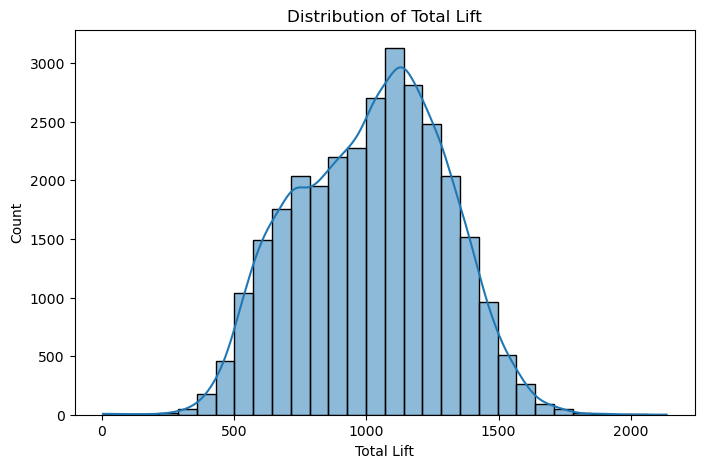

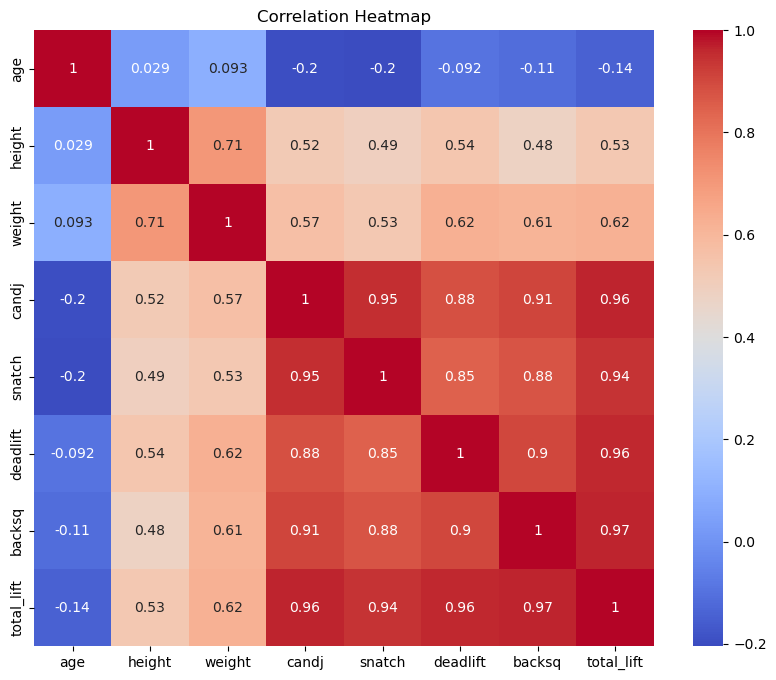

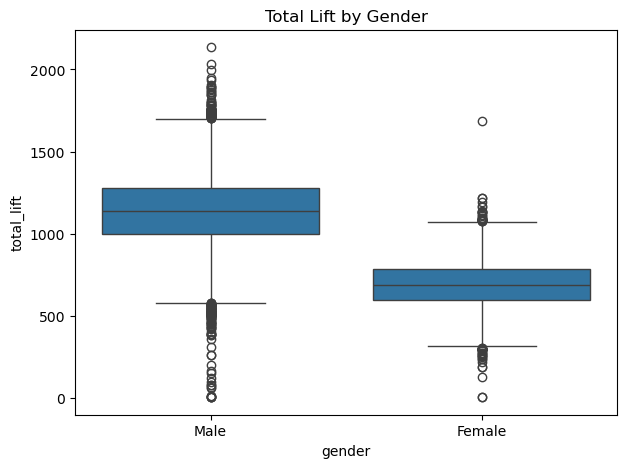

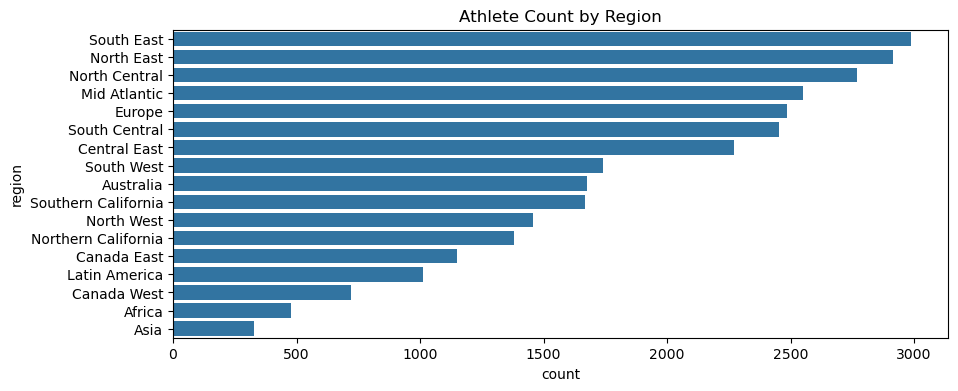

In [22]:
# EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("athletes_v2.csv")

# Display first few rows
print("🔍 First 5 rows:")
display(df.head())

# Summary stats
print("Summary statistics:")
display(df.describe())

# Data types & missing values
print("Data types and missing values:")
display(df.info())
display(df.isnull().sum())

# Distribution of total_lift
plt.figure(figsize=(8, 5))
sns.histplot(df['total_lift'], bins=30, kde=True)
plt.title('Distribution of Total Lift')
plt.xlabel('Total Lift')
plt.ylabel('Count')
plt.show()

# Correlation heatmap (numerical features)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of total_lift by gender
plt.figure(figsize=(7, 5))
sns.boxplot(x='gender', y='total_lift', data=df)
plt.title('Total Lift by Gender')
plt.show()

# Count plot of regions
plt.figure(figsize=(10, 4))
sns.countplot(y='region', data=df, order=df['region'].value_counts().index)
plt.title('Athlete Count by Region')
plt.show()


### EDA Comments
- The v1 dataset contains over 400,000 records but is heavily affected by missing and extreme values. Key features such as age, height, weight, and the lift components (candj, snatch, deadlift, backsq) have 20–60% missing data, while benchmark workout fields like fran, filthy50, and run400 are missing in over 80% of rows. Several numeric columns also contain extreme or clearly invalid values—for example, heights and lifts exceeding 8 million. These quality issues make thorough data cleaning essential before reliable modeling can occur (as we will see with v2)

# ML Model to predict "total_lift"
- For modeling, I selected features directly related to physical performance and total_lift—specifically age, height, weight, and the four component lifts (candj, snatch, deadlift, backsq). These features are more complete and relevant compared to others, though I excluded rows with missing values or extreme outliers (e.g., implausible lift or height values). I excluded high-missingness and less reliable features like benchmark WODs and survey responses.

In [24]:
# Load the Train/Test Datasets

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define your features and target
features = ['age', 'height', 'weight', 'candj', 'snatch', 'backsq', 'deadlift']
target = 'total_lift'

# Drop rows with NaNs only in feature columns (and optionally target)
train_df = train_df.dropna(subset=features + [target])
test_df = test_df.dropna(subset=features + [target])

# Now extract X and y
X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]


In [25]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# Predict
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Baseline Model Metrics (v1):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Baseline Model Metrics (v1):
MAE: 0.00
RMSE: 0.00
R² Score: 1.00


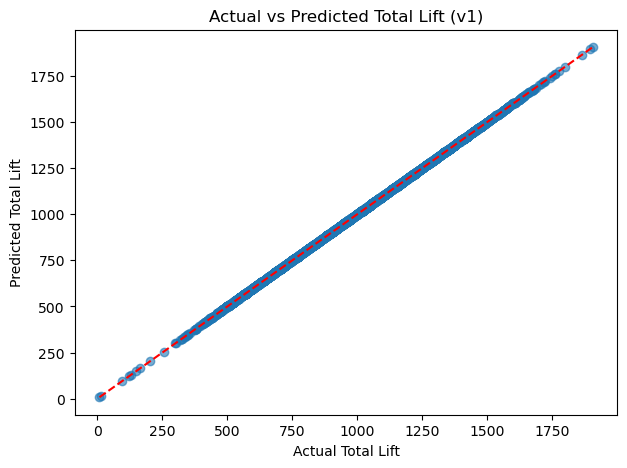

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Total Lift")
plt.ylabel("Predicted Total Lift")
plt.title("Actual vs Predicted Total Lift (v1)")
plt.show()


# 🧠 Baseline Model Comparison: v1 vs v2

| Version | MAE | RMSE | R² Score |
|---------|-----|------|----------|
| v1 | 0.0 | 0.0 | 1.0 |
| v2 | 0.0 | 0.0 | 1.0 |

### 📊 Visualizations:

#### Eda Boxplot Gender V1
![eda_boxplot_gender_v1.png](./eda_boxplot_gender_v1.png)

#### Eda Boxplot Gender V2
![eda_boxplot_gender_v2.png](./eda_boxplot_gender_v2.png)

#### Eda Corr Heatmap V1
![eda_corr_heatmap_v1.png](./eda_corr_heatmap_v1.png)

#### Eda Corr Heatmap V2
![eda_corr_heatmap_v2.png](./eda_corr_heatmap_v2.png)

#### Eda Region Count V1
![eda_region_count_v1.png](./eda_region_count_v1.png)

#### Eda Region Count V2
![eda_region_count_v2.png](./eda_region_count_v2.png)

#### Eda Total Lift Dist V1
![eda_total_lift_dist_v1.png](./eda_total_lift_dist_v1.png)

#### Eda Total Lift Dist V2
![eda_total_lift_dist_v2.png](./eda_total_lift_dist_v2.png)

#### Pred Vs Actual V1
![pred_vs_actual_v1.png](./pred_vs_actual_v1.png)

#### Pred Vs Actual V2
![pred_vs_actual_v2.png](./pred_vs_actual_v2.png)

### Model Comments
The baseline model achieved perfect metrics (MAE: 0.00, RMSE: 0.00, R²: 1.00), which is unrealistic and suggests a data quality issue. This is likely due to extreme or invalid values in the target variable total_lift—such as repeated or inflated values—that make the model appear perfectly predictive without actually learning meaningful patterns. Further cleaning and outlier removal are necessary to obtain reliable performance metrics.
